# Projet Planification de raccordement

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

#### Chargement des shapefiles

In [ ]:
batiments = gpd.read_file("../data/utils/batiments.shp")
infrastructures = gpd.read_file("../data/utils/infrastructures.shp")

In [22]:
print(batiments.head())

    id_bat  nb_maisons                       geometry              x  \
0  E000270         1.0  POINT (531436.652 259655.507)  531436.652430   
1  E000010         1.0  POINT (531445.663 259480.504)  531445.662803   
2  E000060         1.0  POINT (531529.658 259588.506)  531529.657520   
3  E000200         1.0  POINT (531217.642 259637.504)  531217.641986   
4  E000249         1.0  POINT (531369.649 259611.505)  531369.648774   

               y  
0  259655.507015  
1  259480.504120  
2  259588.505948  
3  259637.504373  
4  259611.505495  


In [21]:
print(infrastructures.head())

  infra_id   longueur                                           geometry
0  P007320   5.495148  LINESTRING (531440.661 259482.497, 531436.99 2...
1  P000352   3.332987  LINESTRING (531433.814 259487.594, 531436.99 2...
2  P007286   7.275098  LINESTRING (531438.662 259479.506, 531436.99 2...
3  P007115  10.593967  LINESTRING (531445.663 259480.504, 531436.99 2...
4  P007321  12.814338  LINESTRING (531447.665 259479.5, 531436.99 259...


#### Affichage des batiments sur une carte

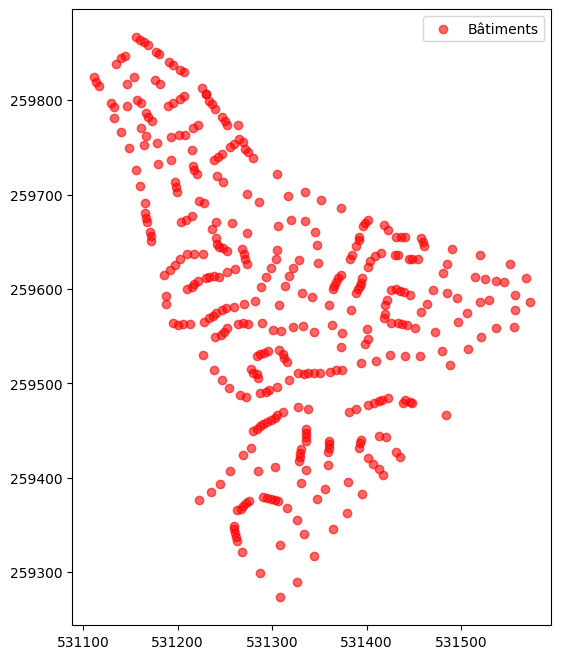

In [23]:
fig, ax = plt.subplots(figsize=(10, 8))
batiments.plot(ax=ax, color='red', alpha=0.6, label='Bâtiments')
plt.legend()
plt.show()

#### Affichage des infrastrcutures sur une carte

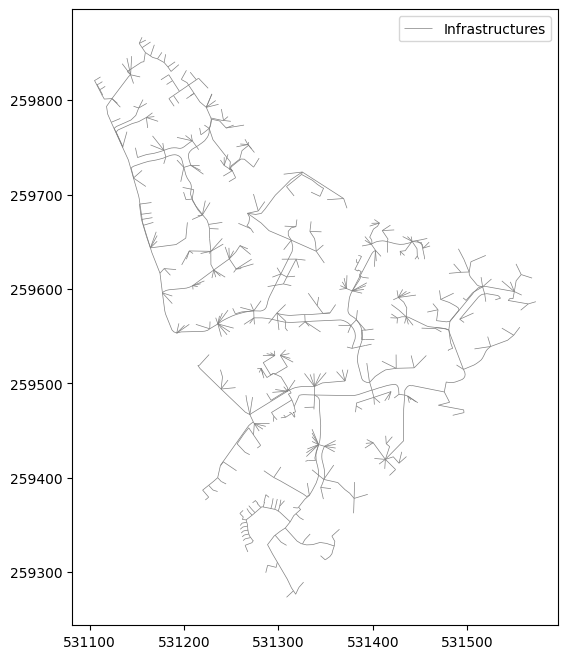

In [24]:
fig, ax = plt.subplots(figsize=(10, 8))
infrastructures.plot(ax=ax, color='grey', linewidth=0.5, label='Infrastructures')
plt.legend()
plt.show()


#### Affichage globale

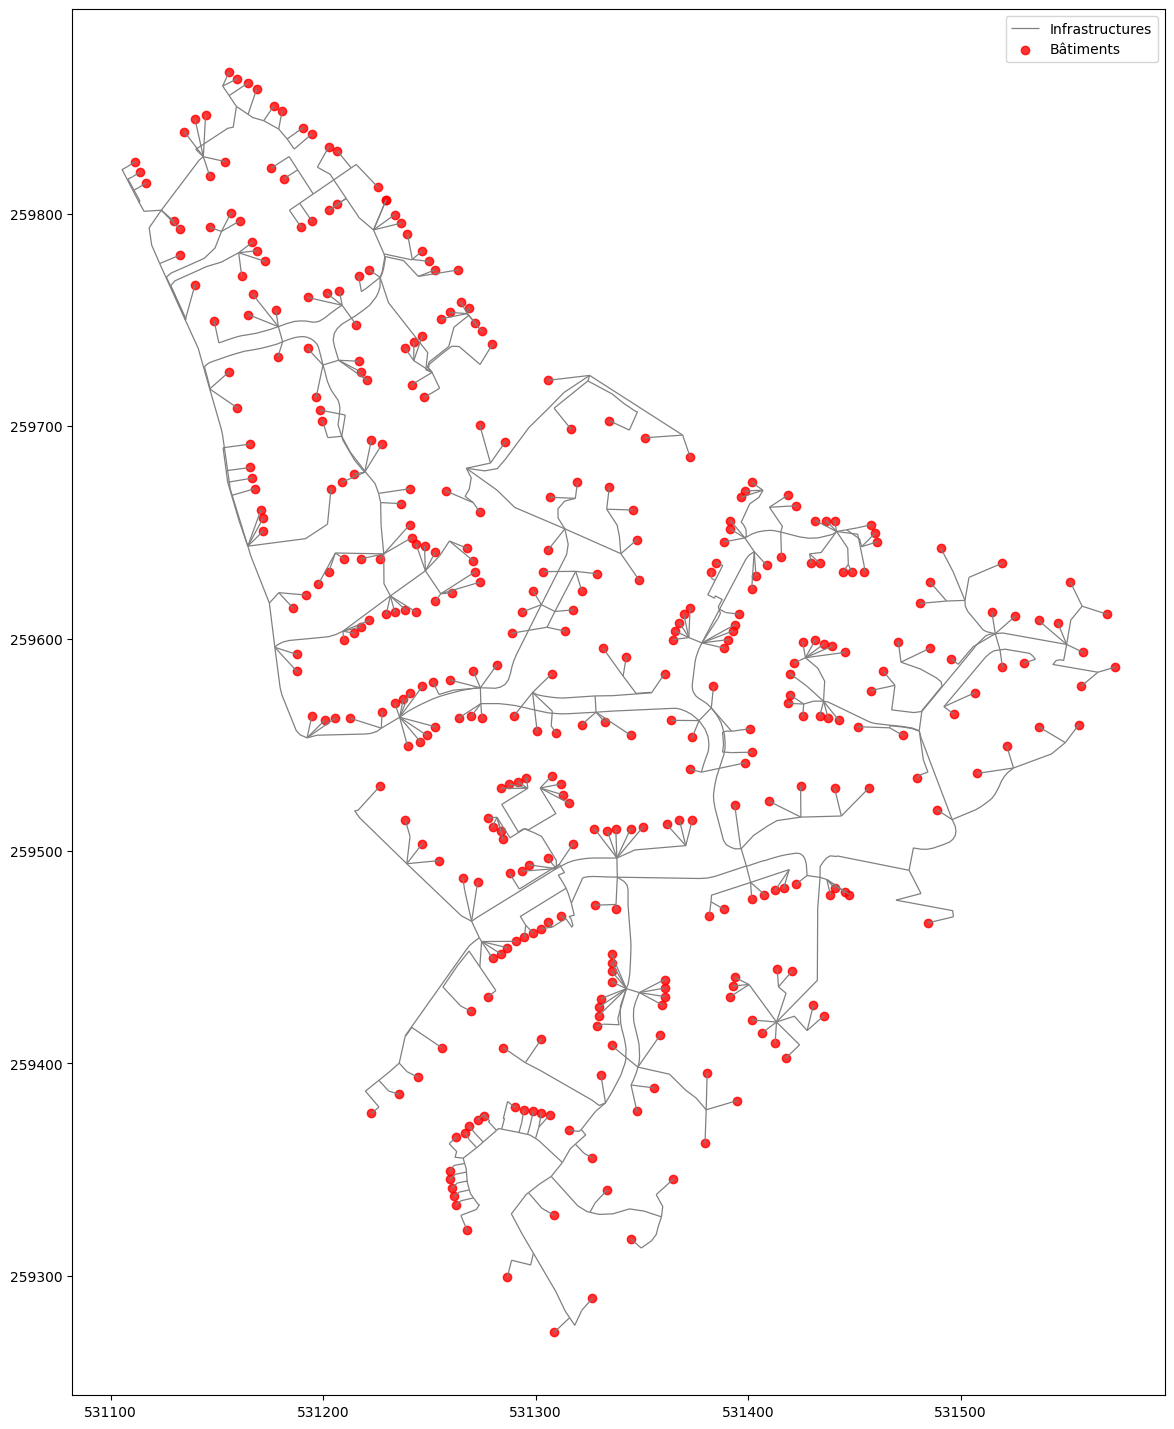

In [26]:
fig, ax = plt.subplots(figsize=(20, 18))
infrastructures.plot(ax=ax, color='grey', linewidth=0.9, label='Infrastructures')
batiments.plot(ax=ax, color='red', alpha=0.8, label='Bâtiments')
plt.legend()
plt.show()


#### Chargement du fichier Excel

In [11]:
data = pd.read_excel("../data/csv_files/reseau_en_arbre.xlsx")
data.head()

,id_batiment,nb_maisons,infra_id,infra_type,longueur
0,E000001,4,P007111,infra_intacte,12.314461
1,E000001,4,P007983,infra_intacte,40.320929
2,E000001,4,P000308,infra_intacte,39.140799
3,E000001,4,P007819,infra_intacte,17.390464
4,E000002,1,P007111,infra_intacte,12.314461


In [27]:
# Filtrer les données pour 'infra_intacte'
data_infra = data[data['infra_type'] == "infra_intacte"]
data_infra

,id_batiment,nb_maisons,infra_id,infra_type,longueur
0,E000001,4,P007111,infra_intacte,12.314461
1,E000001,4,P007983,infra_intacte,40.320929
2,E000001,4,P000308,infra_intacte,39.140799
3,E000001,4,P007819,infra_intacte,17.390464
4,E000002,1,P007111,infra_intacte,12.314461
...,...,...,...,...,...
6095,E000381,1,P000335,infra_intacte,27.889780
6096,E000381,1,P000211,infra_intacte,7.712183
6097,E000381,1,P000226,infra_intacte,49.112131
6098,E000381,1,P000023,infra_intacte,11.338971


In [31]:
# Récupérer les identifiants uniques des bâtiments à partir de data_infra
data_id_batiment_intacte = data_infra['id_batiment'].unique()
data_id_batiment_intacte

array(['E000001', 'E000002', 'E000003', 'E000004', 'E000005', 'E000006',
       'E000007', 'E000008', 'E000009', 'E000010', 'E000011', 'E000012',
       'E000013', 'E000014', 'E000015', 'E000016', 'E000017', 'E000018',
       'E000019', 'E000020', 'E000021', 'E000022', 'E000023', 'E000024',
       'E000025', 'E000026', 'E000027', 'E000028', 'E000029', 'E000030',
       'E000031', 'E000032', 'E000033', 'E000034', 'E000035', 'E000036',
       'E000037', 'E000038', 'E000039', 'E000040', 'E000041', 'E000042',
       'E000043', 'E000044', 'E000045', 'E000046', 'E000047', 'E000048',
       'E000049', 'E000050', 'E000051', 'E000052', 'E000053', 'E000054',
       'E000055', 'E000056', 'E000057', 'E000058', 'E000059', 'E000060',
       'E000061', 'E000062', 'E000063', 'E000064', 'E000065', 'E000066',
       'E000067', 'E000068', 'E000069', 'E000070', 'E000071', 'E000072',
       'E000073', 'E000074', 'E000075', 'E000076', 'E000077', 'E000078',
       'E000079', 'E000080', 'E000081', 'E000082', 

In [32]:
# Extraire les coordonnées x et y depuis la géométrie
batiments["x"] = batiments.geometry.x
batiments["y"] = batiments.geometry.y

# Transformer en dictionnaire : id_bat → (x, y)
coord_dict = dict(zip(batiments["id_bat"], zip(batiments["x"], batiments["y"])))

# Filtrer uniquement les IDs demandés
result_batiment_intacte = {id_: coord_dict[id_] for id_ in data_id_batiment_intacte if id_ in coord_dict}

In [33]:
print(result_batiment_intacte)

{'E000001': (531507.6599667899, 259536.5046729042), 'E000002': (531521.6628579076, 259549.50810182287), 'E000003': (531484.6501085012, 259466.1970761367), 'E000004': (531555.6577313315, 259559.5032153332), 'E000005': (531536.660557511, 259558.50917376042), 'E000006': (531488.663585603, 259519.5069053099), 'E000007': (531422.6639181357, 259484.50159096468), 'E000008': (531440.660865576, 259482.4971276555), 'E000009': (531438.6621489752, 259479.50597440865), 'E000010': (531445.6628026704, 259480.5041201503), 'E000011': (531447.6649677337, 259479.49995048513), 'E000012': (531406.665499368, 259414.49695434357), 'E000013': (531412.6630700242, 259409.50314778142), 'E000014': (531401.6666384856, 259420.4966293954), 'E000015': (531525.6558242501, 259610.50252368627), 'E000016': (531514.6589893111, 259612.5032607771), 'E000017': (531413.6626772481, 259444.49789389886), 'E000018': (531420.6615360202, 259443.50381089066), 'E000019': (531393.6645025122, 259440.50635228545), 'E000020': (531392.6634

AttributeError: 'dict' object has no attribute 'plot'

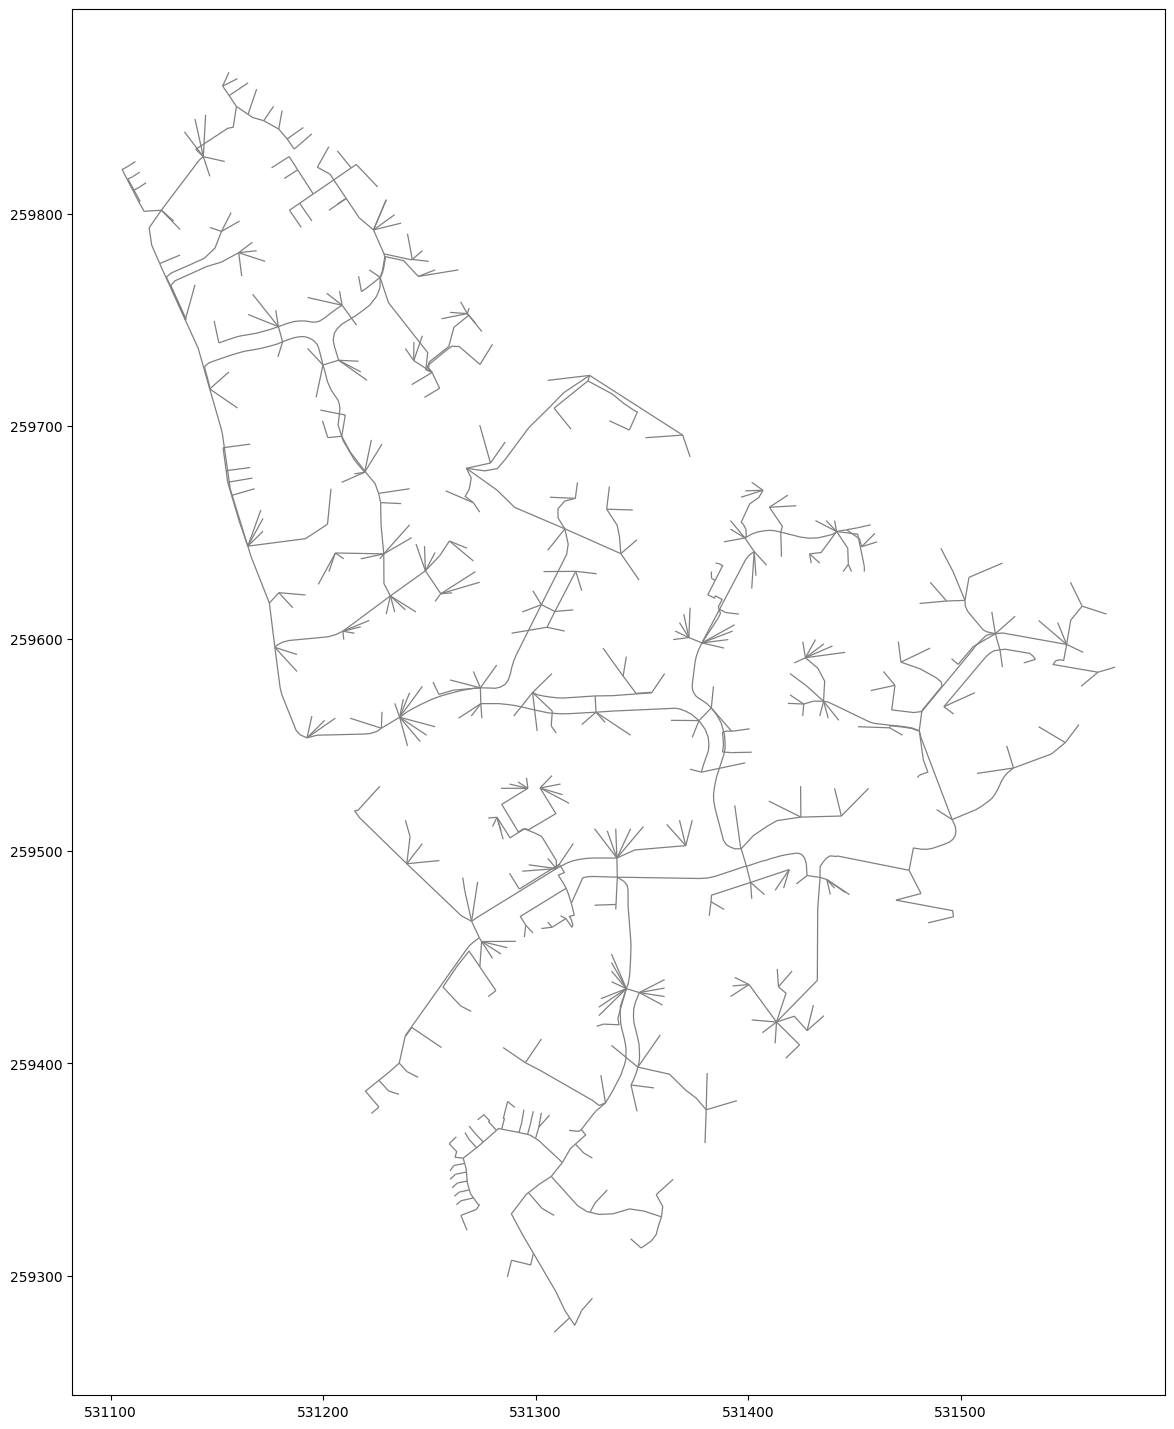

In [41]:
# Visualisation des bâtiments intacts sur la carte des infrastructures
fig, ax = plt.subplots(figsize=(20, 18))
infrastructures.plot(ax=ax, color='grey', linewidth=0.9, label='Infrastructures')
result_batiment_intacte.plot(ax=ax, color='green', alpha=0.8, label='Bâtiments')
plt.legend()
plt.show()

In [44]:
# Filtrer les infrastructures à remplacer
broken_network_df = data[data["infra_type"] == "a_remplacer"]

# Créer des ensembles (sets) d'identifiants de bâtiments
set_id_batiments = set(data["id_batiment"].values)
set_id_broken_batiments = set(broken_network_df["id_batiment"].values)

In [46]:
# Initialiser les listes pour les résultats
list_id_batiment = []
state_batiment = []

# Déterminer l'état de chaque bâtiment
for id_batiment in set_id_batiments:
    list_id_batiment.append(id_batiment)
    if id_batiment in set_id_broken_batiments:
        state_batiment.append("a_reparer")
    else:
        state_batiment.append("intact")

In [47]:
# Créer un DataFrame final avec l'état de chaque bâtiment
state_df = pd.DataFrame({
    "id_batiment": list_id_batiment,
    "state_batiment": state_batiment
})
state_df.to_csv("../data/csv_files/etat_batiments.csv", index=False)

In [48]:
# Afficher le résultat
print(state_df)

    id_batiment state_batiment
0       E000376      a_reparer
1       E000287         intact
2       E000123         intact
3       E000185      a_reparer
4       E000113         intact
..          ...            ...
376     E000250         intact
377     E000152         intact
378     E000074         intact
379     E000174      a_reparer
380     E000154         intact

[381 rows x 2 columns]
